In [34]:
import charts_function_list
import os

In [36]:
_,data,outputs = charts_function_list.folder_setup()
lego = os.path.join(data,'lego-database')
os.chdir(lego)

In [106]:
df_values = [x.split('.csv')[0] for x in os.listdir(lego)] 
df_values.remove('downloads_schema.png') #known non .csv

#set dictionary of all csvs
lego_d = {i:pd.read_csv(i+'.csv') for i in df_values}

In [ ]:
#function to convert hex to rgb
def hex_to_rgb(value):
    value = value.lstrip('#')
    lv = len(value)
    return tuple(int(value[i:i + lv // 3], 16) for i in range(0, lv, lv // 3))

In [108]:
#begin with the colors
colors = lego_d["colors"]
colors = pd.concat([colors,pd.DataFrame(list(colors['rgb'].apply(hex_to_rgb).values),columns=['R','G','B'])],axis=1)

In [110]:
lego_d.keys()

dict_keys(['part_categories', 'inventories', 'parts', 'inventory_sets', 'inventory_parts', 'colors', 'sets', 'themes'])

In [132]:
color_dictionary ={k:v for k,v in zip(lego_d["colors"]['id'].values,lego_d["colors"]['rgb'].values)}
lego_d["inventory_parts"]['color_hex'] = lego_d["inventory_parts"]['color_id'].map(color_dictionary)

In [134]:
lego_d["inventory_parts"]['color_hex'] = lego_d["inventory_parts"]['color_id'].map(color_dictionary)

In [137]:
lego_d["inventory_parts"] = pd.concat([lego_d["inventory_parts"],pd.DataFrame(list(lego_d["inventory_parts"]['color_hex'].apply(hex_to_rgb).values),columns=['R','G','B'])],axis=1)
lego_d["inventory_parts"] = lego_d["inventory_parts"].reset_index()
lego_part_color_index = lego_d["inventory_parts"].pivot_table('index',index='color_hex',aggfunc='count')
rgb_values = pd.DataFrame(list(lego_part_color_index.reset_index()['color_hex'].apply(hex_to_rgb).values),columns=['R','G','B'])
part_count = pd.concat([lego_part_color_index.reset_index(),rgb_values],axis=1).rename(columns={'index':'Count'})
part_count['color_hex']= part_count['color_hex'].apply(lambda x: "#"+str(x))

In [244]:
lego_d["inventory_parts"]

,index,inventory_id,part_num,color_id,quantity,is_spare,color_hex,R,G,B
0,0,1,48379c01,72,1,f,6C6E68,108,110,104
1,1,1,48395,7,1,f,9BA19D,155,161,157
2,2,1,mcsport6,25,1,f,FE8A18,254,138,24
3,3,1,paddle,0,1,f,05131D,5,19,29
4,4,3,11816pr0005,78,1,f,F6D7B3,246,215,179
5,5,3,2343,47,1,f,FCFCFC,252,252,252
6,6,3,3003,29,1,f,E4ADC8,228,173,200
7,7,3,30176,2,1,f,237841,35,120,65
8,8,3,3020,15,1,f,FFFFFF,255,255,255
9,9,3,3022,15,2,f,FFFFFF,255,255,255


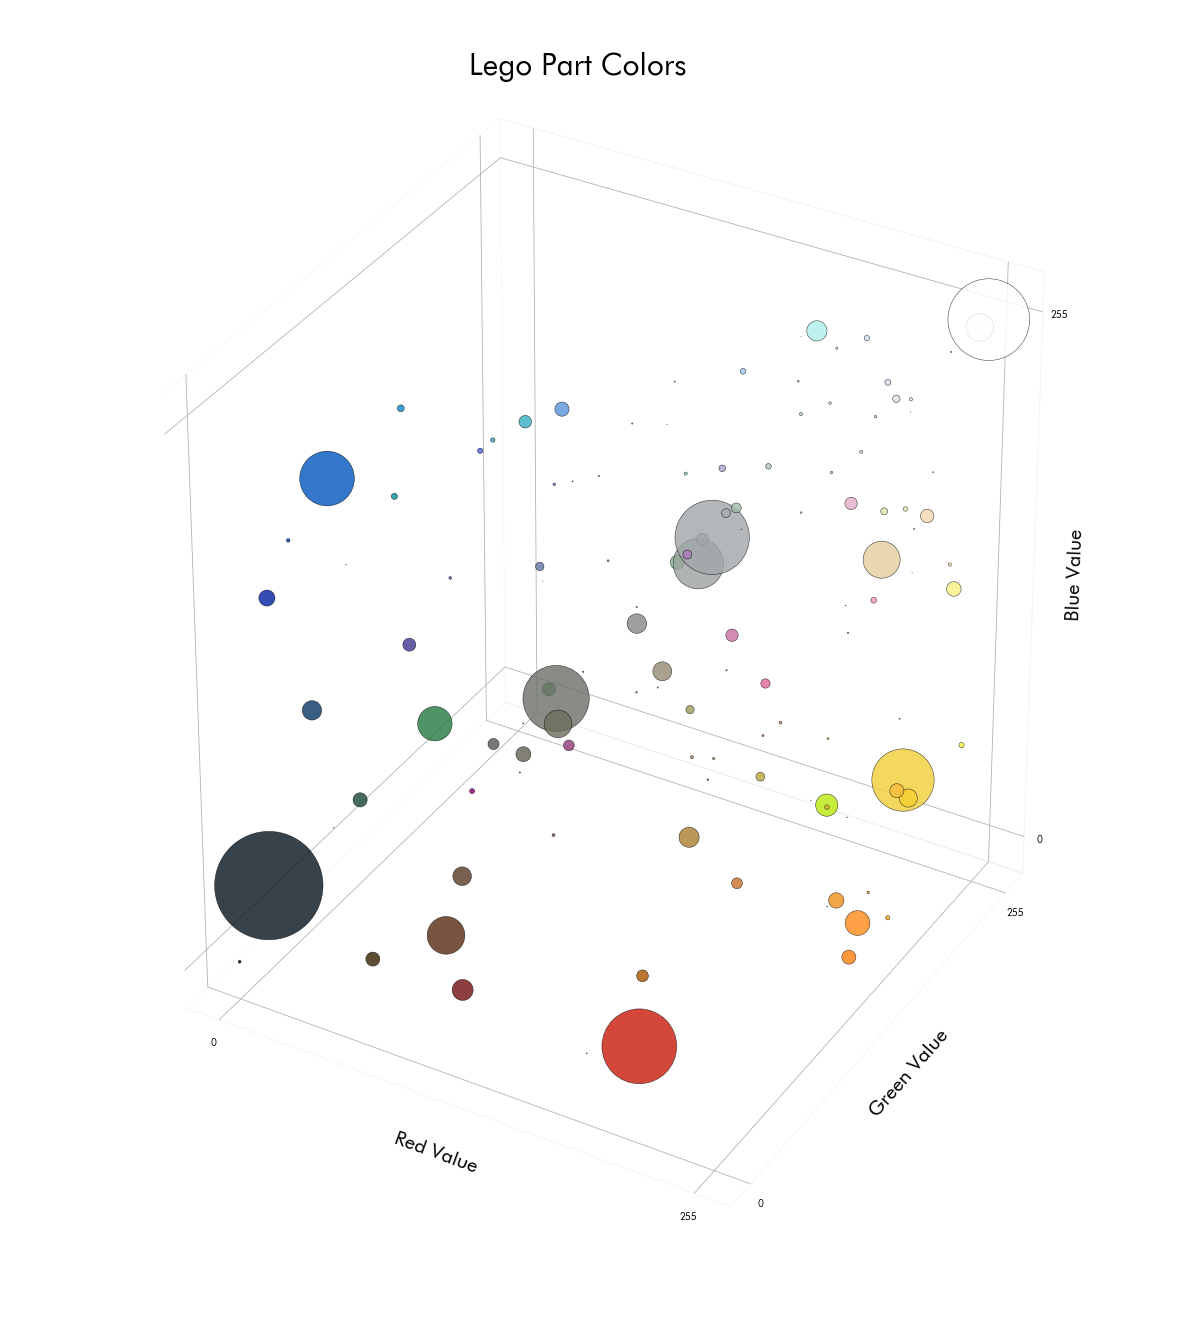

In [240]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(20,20))
fig.suptitle('Lego Part Colors',size=30)
fig.subplots_adjust(top=.99)
ax = fig.add_subplot(111, projection='3d')

ax.scatter(part_count['R'],part_count['G'],part_count['B'],s=part_count['Count']/10,c=part_count['color_hex'],alpha=.8,
           edgecolor='black',linewidth=.5)

ax.set_xlabel('Red Value',fontsize=20)
ax.set_ylabel('Green Value',fontsize=20)
ax.set_zlabel('Blue Value',fontsize=20)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
#ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0)) 
ax.w_xaxis.set_ticks([0,255])
ax.w_yaxis.set_ticks([0,255])
ax.w_zaxis.set_ticks([0,255])
ax.w_xaxis.set_ticks_position('none') 

for t1 in ax.xaxis.get_ticklines():
    t1.set_visible(False)
    
for t1 in ax.yaxis.get_ticklines():
    t1.set_visible(False)
    
for t1 in ax.zaxis.get_ticklines():
    t1.set_visible(False)
    